In [59]:
import pandas as pd #Librería para estructura de datos. Dataframes (conjuntos de datos que me permite recorrer el archivo excel o csv)
import seaborn as sns #Libreria para visualizacion de datos
import matplotlib.pyplot as plt #Seaborn ocupa mat.
import random #Para numeros randomicos
from sklearn.preprocessing import MinMaxScaler #Para escalado
from sklearn.model_selection import train_test_split #sklearn para preprocesar datos y tiene modelos de machine learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense #Capas dentro de un modelo neuronal
from sklearn.metrics import mean_absolute_error #Para ver cuanto se esta equivocando

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
df = pd.read_excel("/content/drive/MyDrive/Seguidor_solar/seguidor_solar_version2.xlsx")
df

,fecha,hora,temperatura(C),nubosidad,velocidad_viento(m/s),direccion_viento,presion(hPa),azimut_sol,elevacion_sol
0,2023-04-01,06:00:00,9.41,100,1.34,125,1018,85.5,-4.5
1,2023-04-01,07:00:00,9.59,100,1.45,123,1017,85.3,10.5
2,2023-04-01,08:00:00,9.70,100,1.50,119,1017,84.8,25.4
3,2023-04-01,09:00:00,9.41,100,1.41,115,1016,83.7,40.3
4,2023-04-01,10:00:00,9.48,95,1.05,116,1016,81.4,55.2
...,...,...,...,...,...,...,...,...,...
788,2023-05-31,14:00:00,13.32,97,0.20,17,1020,311.9,55.5
789,2023-05-31,15:00:00,13.98,94,0.24,26,1019,301.3,43.4
790,2023-05-31,16:00:00,13.75,89,0.55,305,1019,295.9,30.2
791,2023-05-31,17:00:00,13.96,97,0.81,306,1018,293.1,16.5


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha                  793 non-null    datetime64[ns]
 1   hora                   793 non-null    object        
 2   temperatura(C)         793 non-null    float64       
 3   nubosidad              793 non-null    int64         
 4   velocidad_viento(m/s)  793 non-null    float64       
 5   direccion_viento       793 non-null    int64         
 6   presion(hPa)           793 non-null    int64         
 7   azimut_sol             793 non-null    float64       
 8   elevacion_sol          793 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 55.9+ KB


In [63]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temperatura(C),793.0,11.807364,2.789702,6.88,9.67,10.61,14.51,18.96
nubosidad,793.0,85.774275,21.615283,7.00,80.00,97.00,100.00,100.00
velocidad_viento(m/s),793.0,1.195927,0.584922,0.03,0.75,1.21,1.61,2.85
direccion_viento,793.0,175.268600,97.514540,0.00,116.00,123.00,300.00,356.00
presion(hPa),793.0,1017.243380,1.542343,1012.00,1016.00,1017.00,1018.00,1022.00
azimut_sol,793.0,168.709710,118.239790,7.00,68.00,81.80,290.10,332.90
elevacion_sol,793.0,38.231778,25.251665,-4.50,16.50,40.30,61.60,83.30


In [64]:
df.isnull().sum()

fecha                    0
hora                     0
temperatura(C)           0
nubosidad                0
velocidad_viento(m/s)    0
direccion_viento         0
presion(hPa)             0
azimut_sol               0
elevacion_sol            0
dtype: int64

In [65]:
df['dia'] = df['fecha'].apply(lambda date:date.day)
df['mes'] = df['fecha'].apply(lambda date:date.month)
df = df.drop(['fecha'], axis=1)

In [66]:
df['hora'] = df['hora'].apply(lambda date:date.hour)

In [67]:
df

,hora,temperatura(C),nubosidad,velocidad_viento(m/s),direccion_viento,presion(hPa),azimut_sol,elevacion_sol,dia,mes
0,6,9.41,100,1.34,125,1018,85.5,-4.5,1,4
1,7,9.59,100,1.45,123,1017,85.3,10.5,1,4
2,8,9.70,100,1.50,119,1017,84.8,25.4,1,4
3,9,9.41,100,1.41,115,1016,83.7,40.3,1,4
4,10,9.48,95,1.05,116,1016,81.4,55.2,1,4
...,...,...,...,...,...,...,...,...,...,...
788,14,13.32,97,0.20,17,1020,311.9,55.5,31,5
789,15,13.98,94,0.24,26,1019,301.3,43.4,31,5
790,16,13.75,89,0.55,305,1019,295.9,30.2,31,5
791,17,13.96,97,0.81,306,1018,293.1,16.5,31,5


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hora                   793 non-null    int64  
 1   temperatura(C)         793 non-null    float64
 2   nubosidad              793 non-null    int64  
 3   velocidad_viento(m/s)  793 non-null    float64
 4   direccion_viento       793 non-null    int64  
 5   presion(hPa)           793 non-null    int64  
 6   azimut_sol             793 non-null    float64
 7   elevacion_sol          793 non-null    float64
 8   dia                    793 non-null    int64  
 9   mes                    793 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 62.1 KB


<Axes: title={'center': 'Corr. Pearson Seguidor Solar VERSION 2'}>

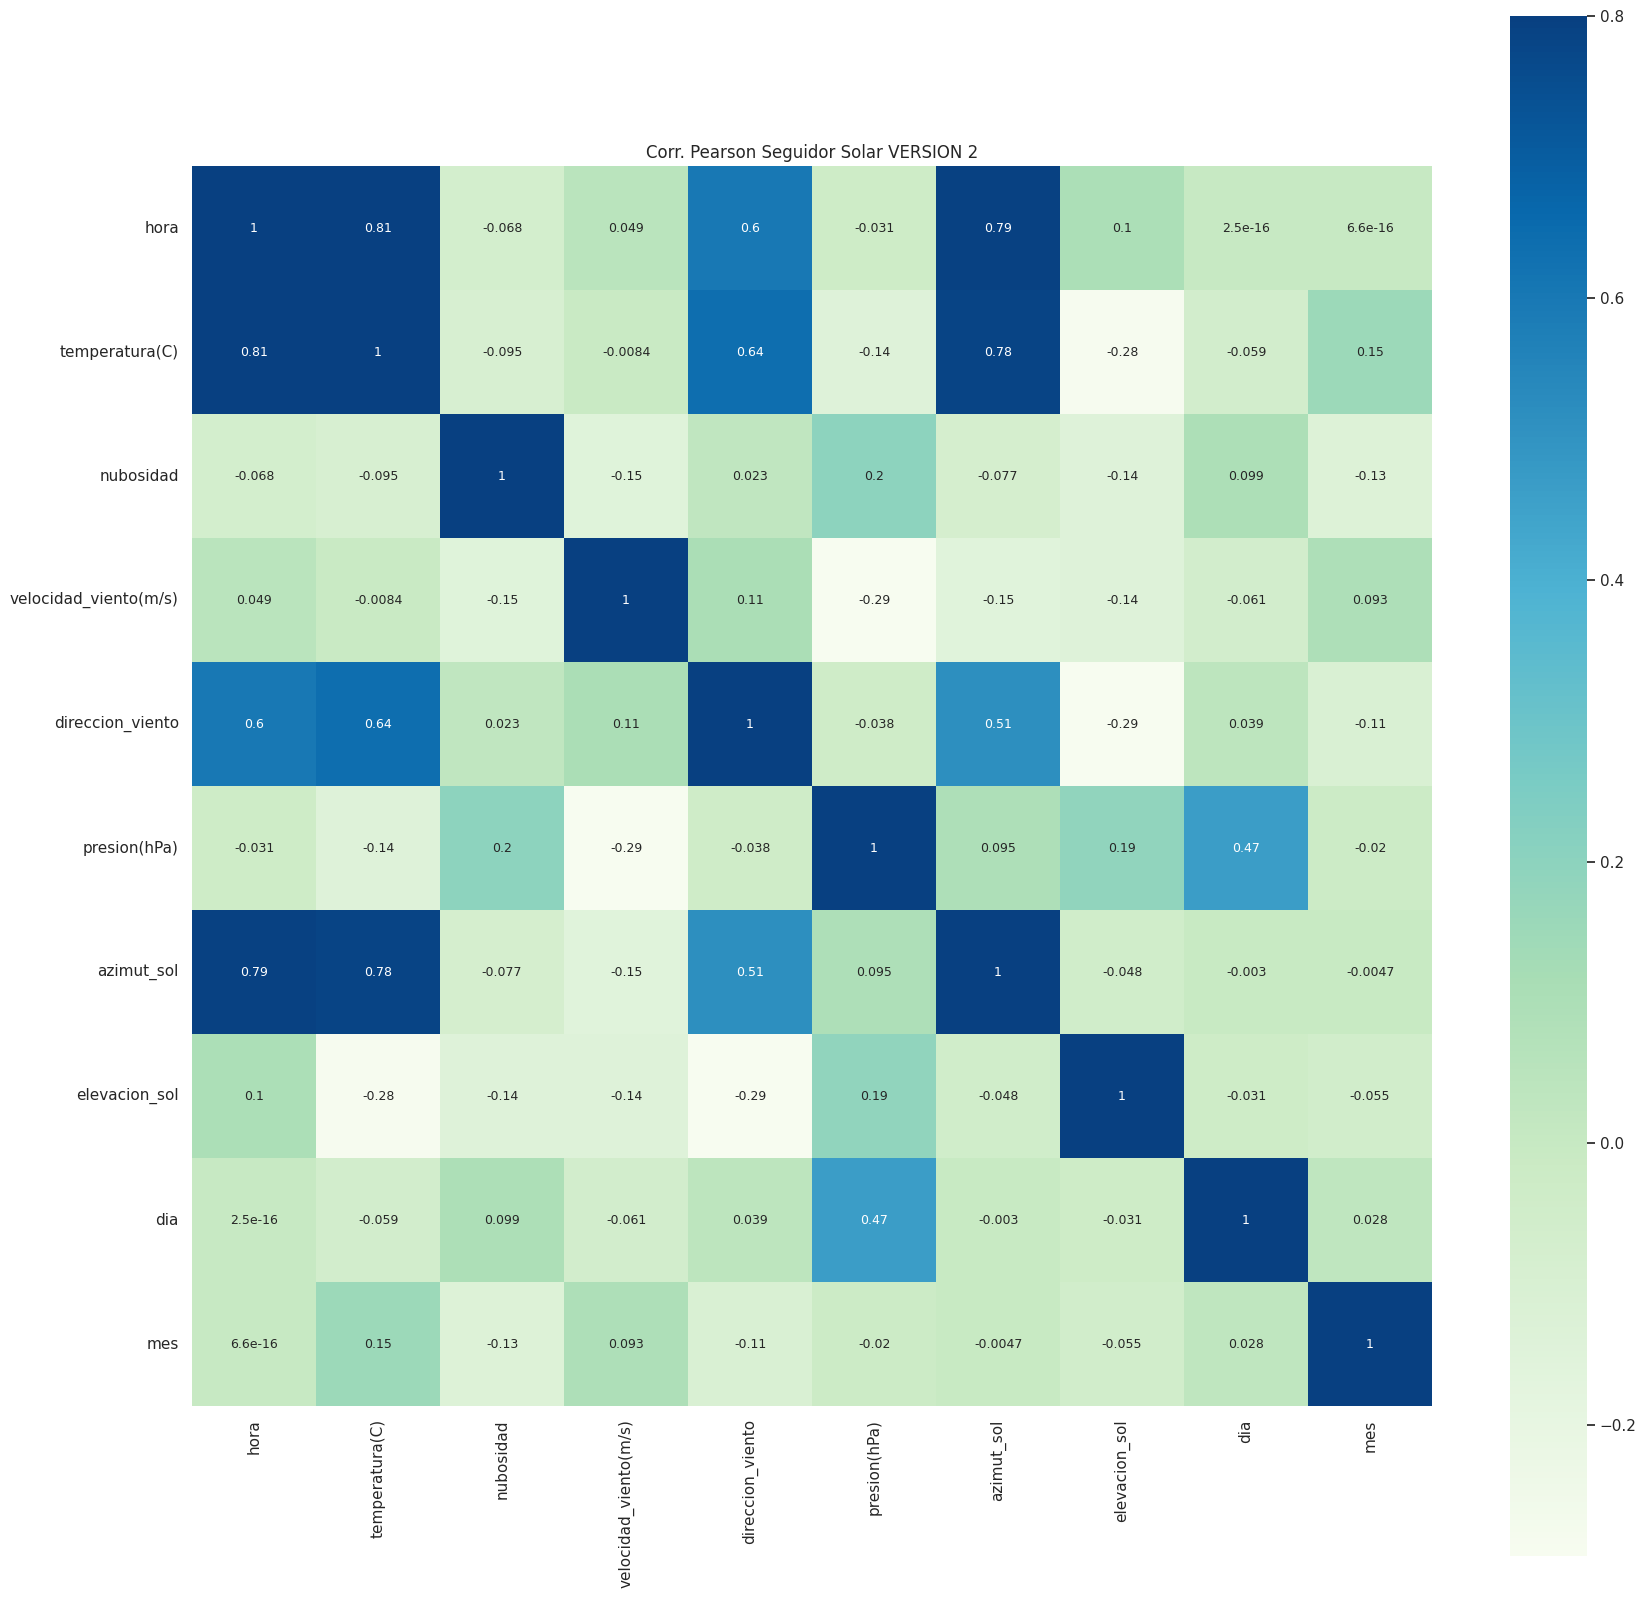

In [69]:
sns.set(style='whitegrid', font_scale=1) #Para ajustar el tamaño. Hacer un zoom sobre el mismo tamaño.
plt.figure(figsize=(20,20)) #Ajuste de Tamaño
plt.title("Corr. Pearson Seguidor Solar VERSION 2")
sns.heatmap(df.corr(), vmax=0.8, square=True, cmap="GnBu", linecolor='r', annot=True, annot_kws={'size':9})#Mapa de calor.

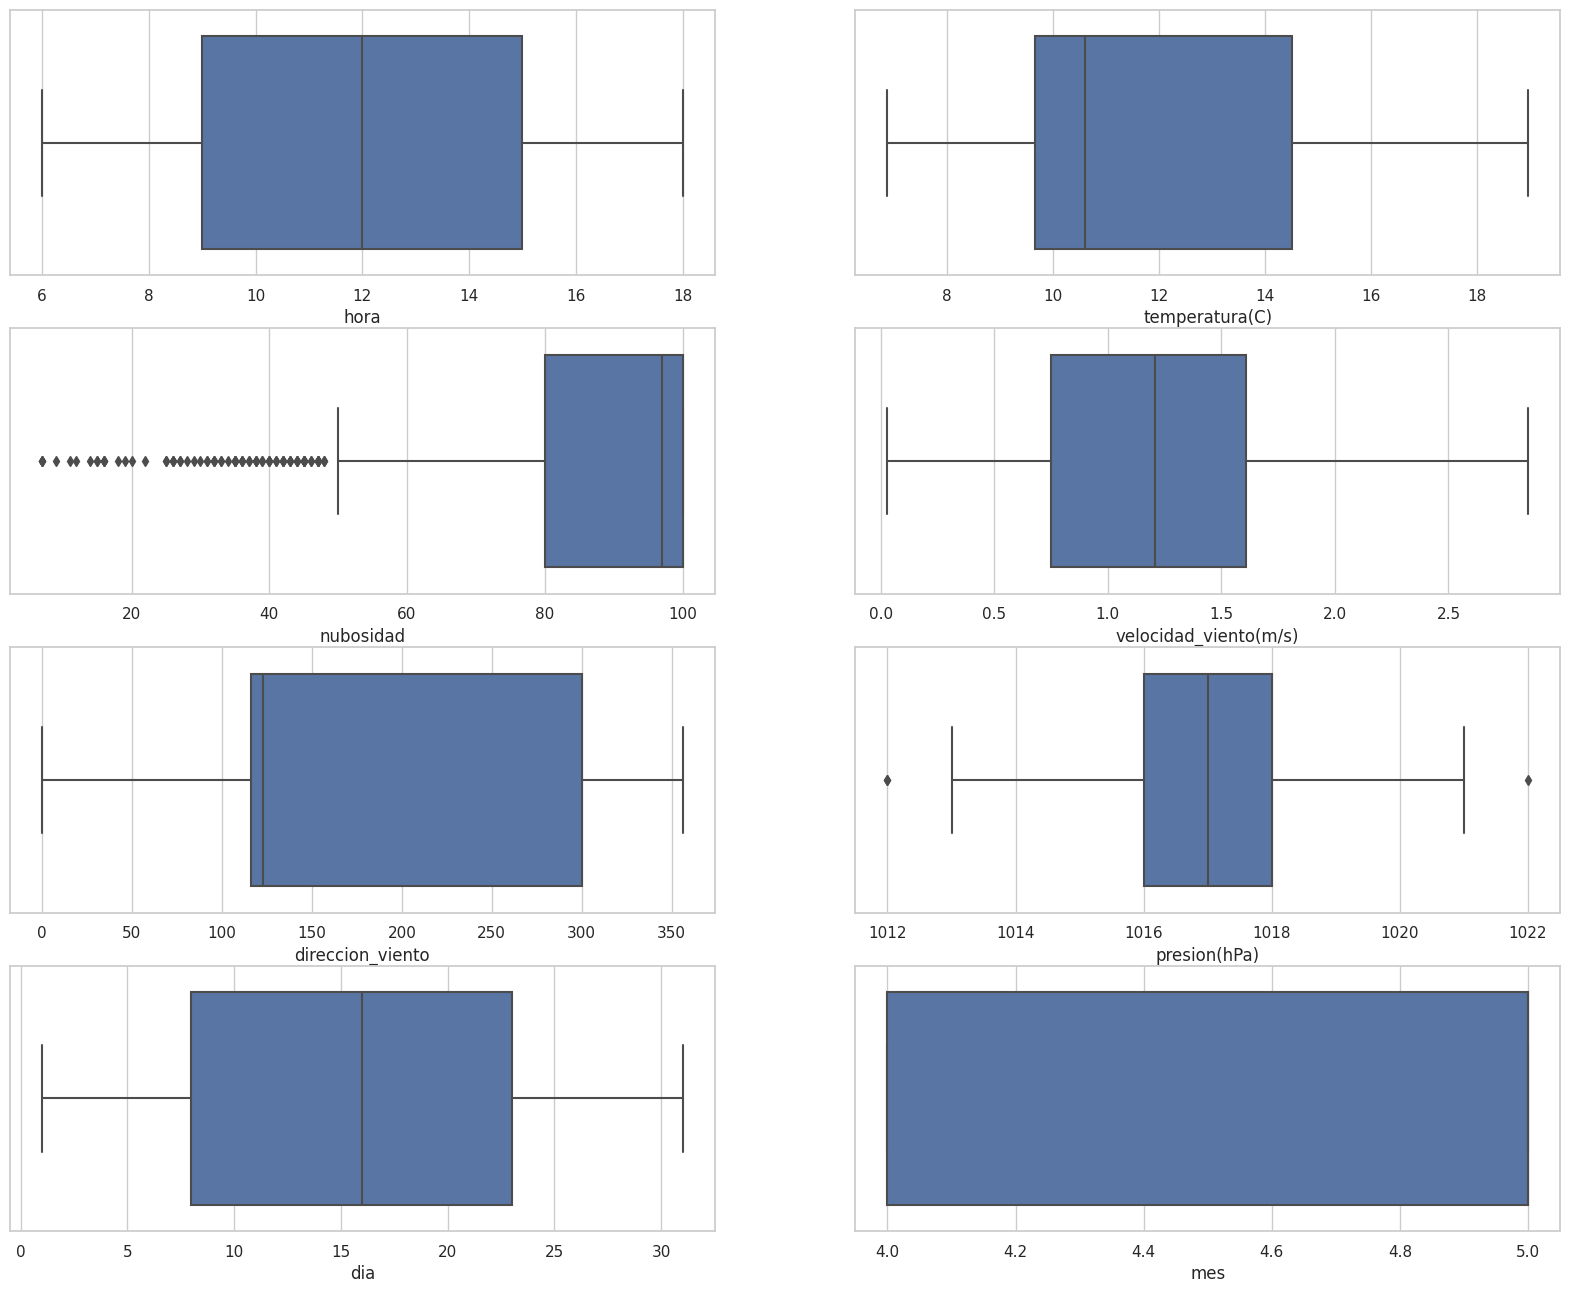

In [70]:
plt.figure(figsize=(20,20))

col = []
for column in df.columns:
  if column not in ['azimut_sol','elevacion_sol']:
    col.append(column)

for i in enumerate(col):
  plt.subplot(5,2,i[0]+1)
  sns.boxplot(x=i[1], data=df)

In [71]:
df_Primero=df #Sin borrar temperatura y hora
df_Segundo=df #Viene borrado temperatura y hora debido a Pearson

In [72]:
objetivo_registros = 2000
registros_adicionales = objetivo_registros - len(df_Primero)
datos_aumentados = []

for i in range(registros_adicionales):
    # Selecciona un registro existente al azar
    registro_existente = df_Primero.sample()

    # Crea una copia del registro existente
    nuevo_registro = registro_existente.copy()

    # Realiza modificaciones aleatorias en las columnas relevantes (temperatura y velocidad del viento dado que son los unicos flotantes originales)
    nuevo_registro['temperatura(C)'] += random.uniform(-0.5, 0.5)
    nuevo_registro['velocidad_viento(m/s)'] += random.uniform(-0.5, 0.5)

    # Agrega el nuevo registro a la lista de datos aumentados
    datos_aumentados.append(nuevo_registro)

df_PrimeroAumentado = pd.concat([df_Primero] + datos_aumentados)

In [73]:
len(df_PrimeroAumentado)

2000

In [74]:
df_PrimeroAumentado

,hora,temperatura(C),nubosidad,velocidad_viento(m/s),direccion_viento,presion(hPa),azimut_sol,elevacion_sol,dia,mes
0,6,9.410000,100,1.340000,125,1018,85.5,-4.5,1,4
1,7,9.590000,100,1.450000,123,1017,85.3,10.5,1,4
2,8,9.700000,100,1.500000,119,1017,84.8,25.4,1,4
3,9,9.410000,100,1.410000,115,1016,83.7,40.3,1,4
4,10,9.480000,95,1.050000,116,1016,81.4,55.2,1,4
...,...,...,...,...,...,...,...,...,...,...
781,7,10.278393,99,0.723302,125,1018,67.6,11.1,31,5
462,13,12.069425,100,1.145034,125,1018,324.9,69.2,6,5
195,6,10.883112,100,0.808093,123,1019,79.9,-3.5,16,4
15,8,10.071099,93,1.137433,121,1016,84.4,25.5,2,4


In [75]:
df_PrimeroAumentado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 684
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hora                   2000 non-null   int64  
 1   temperatura(C)         2000 non-null   float64
 2   nubosidad              2000 non-null   int64  
 3   velocidad_viento(m/s)  2000 non-null   float64
 4   direccion_viento       2000 non-null   int64  
 5   presion(hPa)           2000 non-null   int64  
 6   azimut_sol             2000 non-null   float64
 7   elevacion_sol          2000 non-null   float64
 8   dia                    2000 non-null   int64  
 9   mes                    2000 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 171.9 KB


<Axes: title={'center': 'Corr. Pearson'}>

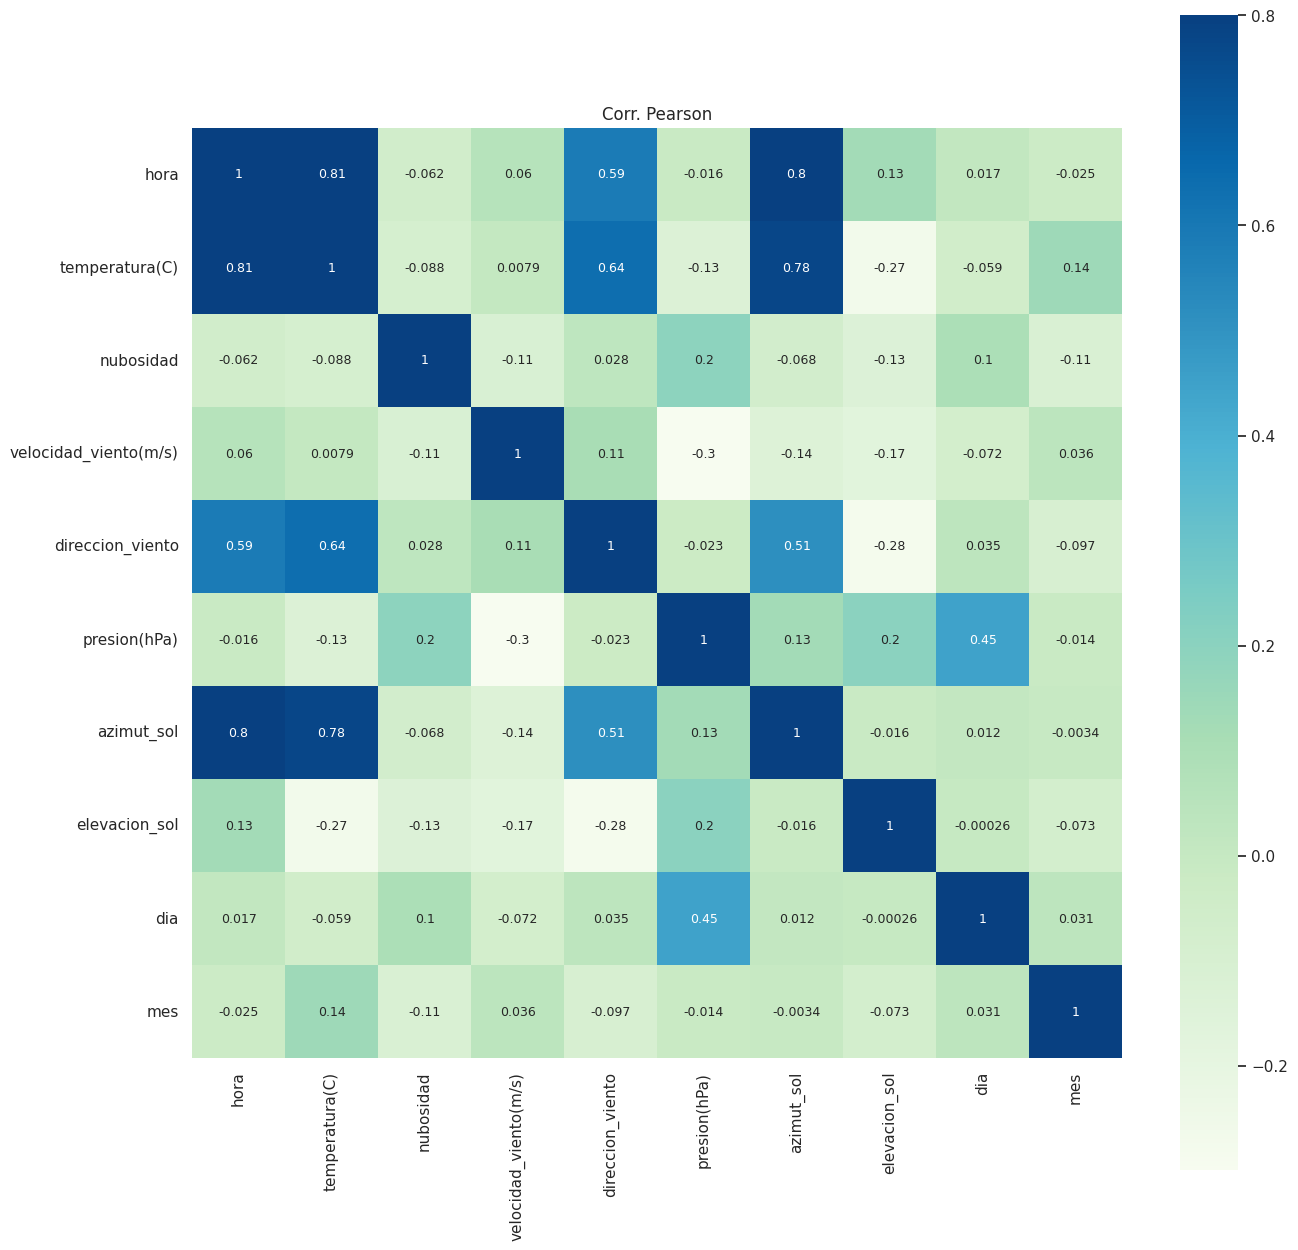

In [76]:
sns.set(style='whitegrid', font_scale=1) #Para ajustar el tamaño. Hacer un zoom sobre el mismo tamaño.
plt.figure(figsize=(15,15)) #Ajuste de Tamaño
plt.title("Corr. Pearson")
sns.heatmap(df_PrimeroAumentado.corr(), vmax=0.8, square=True, cmap="GnBu", linecolor='r', annot=True, annot_kws={'size':9})#Mapa de calor.

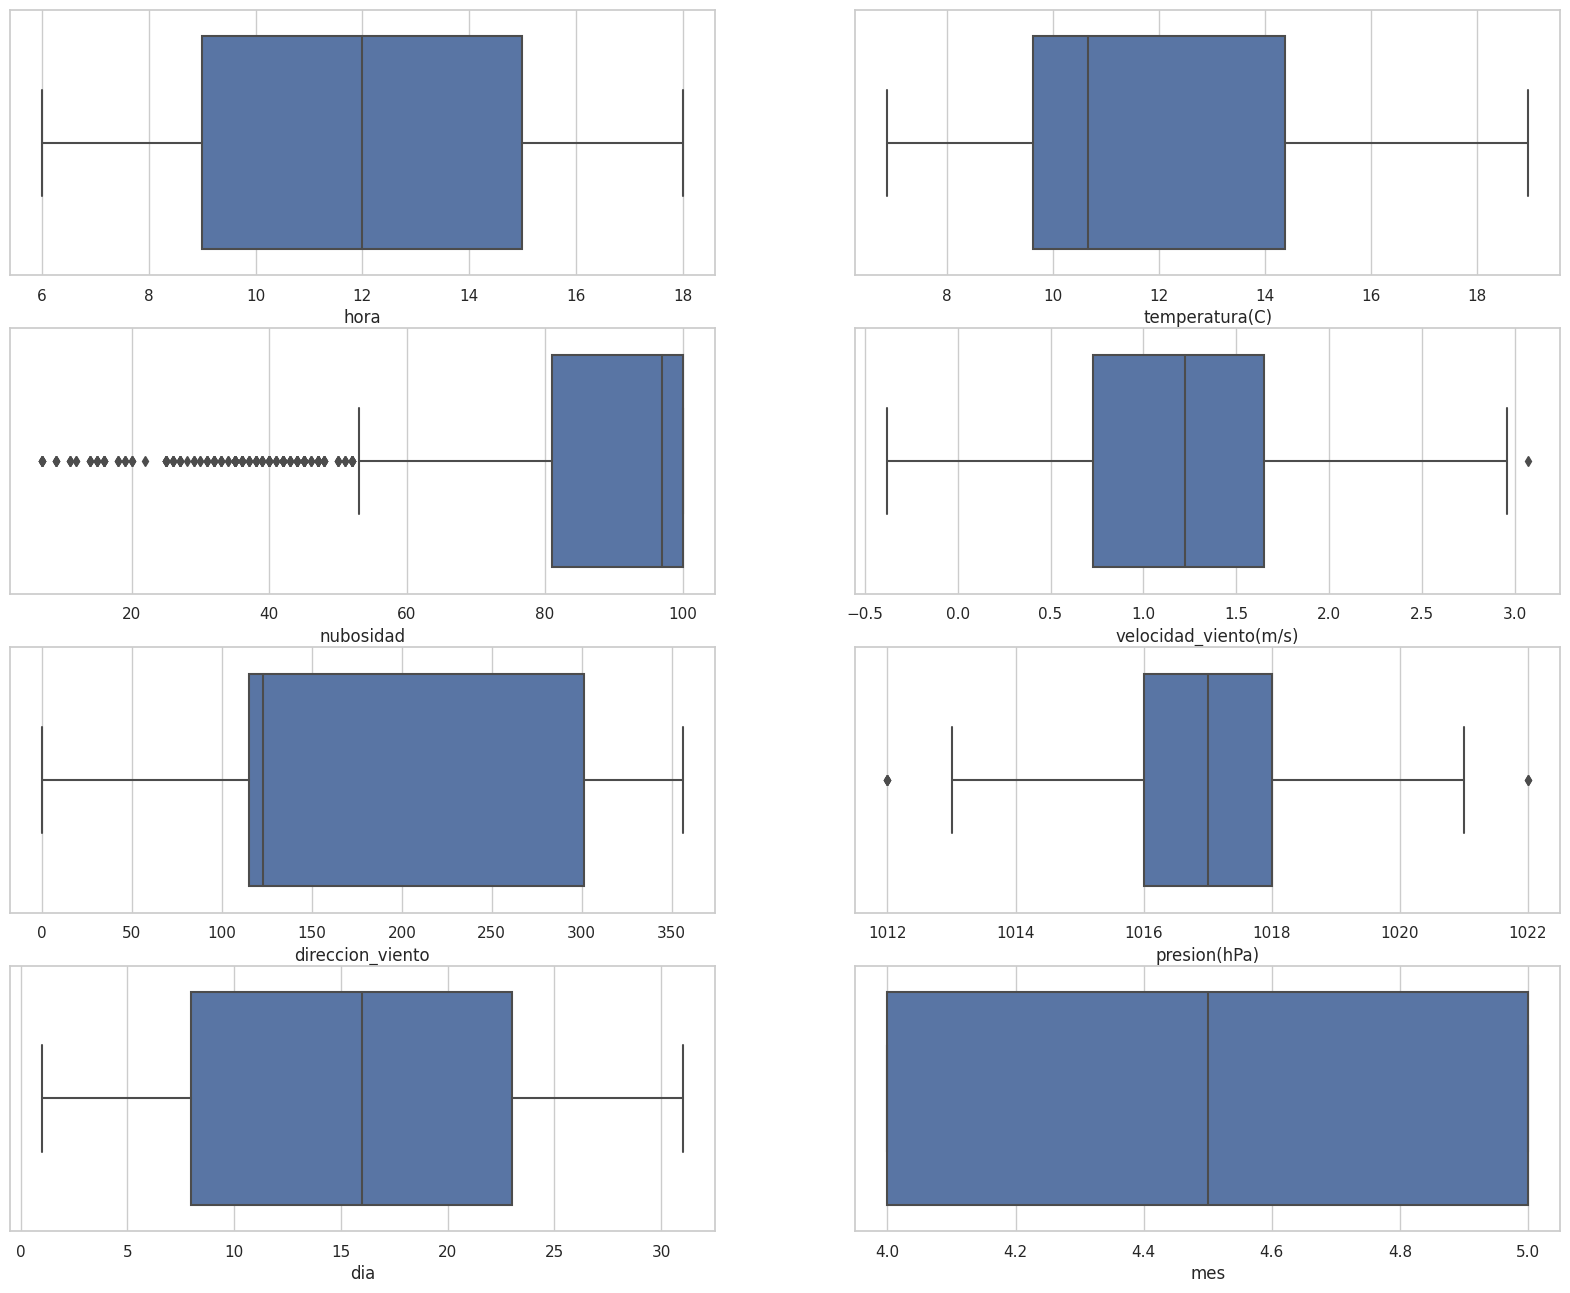

In [77]:
plt.figure(figsize=(20,20))

col = []
for column in df_PrimeroAumentado.columns:
  if column not in ['azimut_sol','elevacion_sol']:
    col.append(column)

for i in enumerate(col):
  plt.subplot(5,2,i[0]+1)
  sns.boxplot(x=i[1], data=df_PrimeroAumentado)

array([[<Axes: title={'center': 'hora'}>,
        <Axes: title={'center': 'temperatura(C)'}>,
        <Axes: title={'center': 'nubosidad'}>],
       [<Axes: title={'center': 'velocidad_viento(m/s)'}>,
        <Axes: title={'center': 'direccion_viento'}>,
        <Axes: title={'center': 'presion(hPa)'}>],
       [<Axes: title={'center': 'azimut_sol'}>,
        <Axes: title={'center': 'elevacion_sol'}>,
        <Axes: title={'center': 'dia'}>],
       [<Axes: title={'center': 'mes'}>, <Axes: >, <Axes: >]],
      dtype=object)

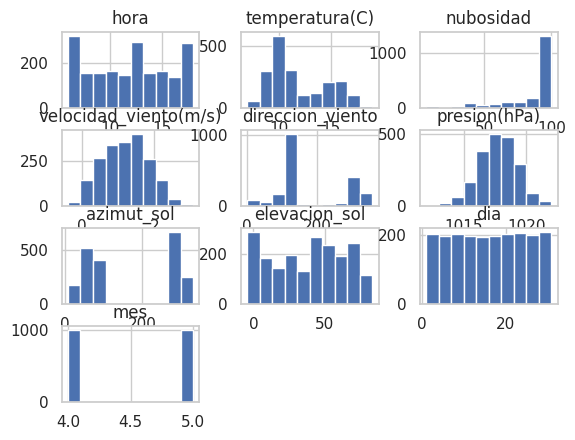

In [78]:
df_PrimeroAumentado.hist()

In [79]:
X_Primero = df_PrimeroAumentado.drop(['azimut_sol','elevacion_sol'], axis=1)
y_Primero = df_PrimeroAumentado[['azimut_sol','elevacion_sol']]

In [80]:
scalerMinMaxPrimero = MinMaxScaler()
scalerMinMaxPrimero.fit(X_Primero)
#guardar el scalerMinMaxPrimero con pickles
X_Primero = scalerMinMaxPrimero.transform(X_Primero)

In [81]:
X_trainPrimero, X_testPrimero, y_trainPrimero, y_testPrimero = train_test_split(X_Primero, y_Primero, random_state=200, test_size=0.3)

In [82]:
#ARQUITECTURA DEL MODELO
modelANNprimero = Sequential()
modelANNprimero.add(Dense(15,activation='relu'))
modelANNprimero.add(Dense(10,activation='relu')) #Aqui va a aprender las caracteristicas de los patrones. Autoencoders es de redes neu que se encogen y se agrandan
#No existe una regla, solo se sabe q es menos que la anterior
modelANNprimero.add(Dense(5,activation='relu'))
modelANNprimero.add(Dense(2))
modelANNprimero.compile(optimizer='adam', loss='mse')#adams o estocastico. El error medio cuadratico es la media del error en regresion, en clasificacion es accurency
#verbose en 1 es para que imprima en la consola y 0 es para que no imprima nada

In [83]:
modelANNprimero.fit(x=X_trainPrimero, y=y_trainPrimero, validation_data=(X_testPrimero,y_testPrimero), batch_size=64, epochs=650, verbose=1)

Epoch 1/650
22/22 [==============================] - 2s 31ms/step - loss: 21991.1934 - val_loss: 21956.3359
Epoch 2/650
22/22 [==============================] - 0s 7ms/step - loss: 21904.0859 - val_loss: 21837.8008
Epoch 3/650
22/22 [==============================] - 0s 7ms/step - loss: 21746.4531 - val_loss: 21625.5195
Epoch 4/650
22/22 [==============================] - 0s 8ms/step - loss: 21478.0723 - val_loss: 21269.3770
Epoch 5/650
22/22 [==============================] - 0s 7ms/step - loss: 21027.1426 - val_loss: 20655.9727
Epoch 6/650
22/22 [==============================] - 0s 11ms/step - loss: 20233.5527 - val_loss: 19612.1348
Epoch 7/650
22/22 [==============================] - 0s 10ms/step - loss: 18954.9434 - val_loss: 18018.6719
Epoch 8/650
22/22 [==============================] - 0s 7ms/step - loss: 17076.1816 - val_loss: 15771.2520
Epoch 9/650
22/22 [==============================] - 0s 8ms/step - loss: 14602.4814 - val_loss: 12992.9580
Epoch 10/650
22/22 [==============

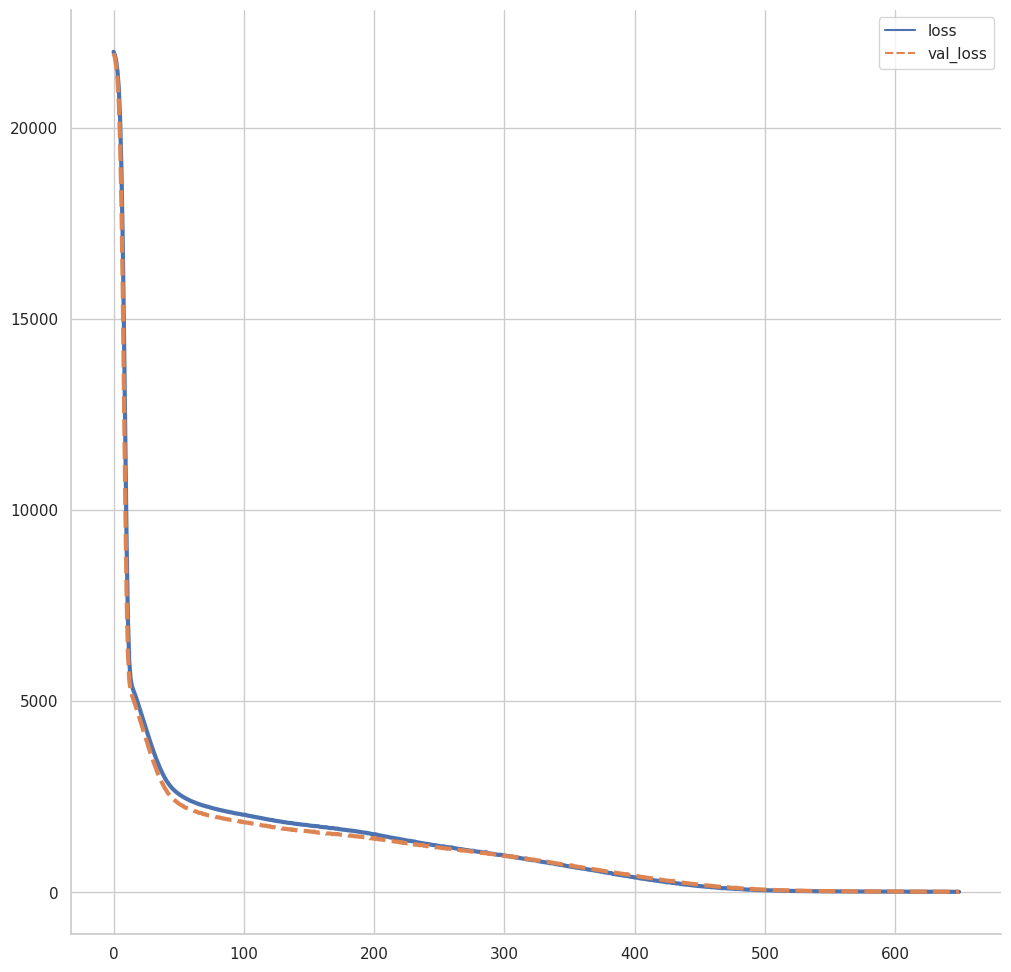

In [84]:
loss = pd.DataFrame(modelANNprimero.history.history)#graficamos la perdida que significa cómo se va ajustando para aprender
plt.figure(figsize=(12,12))
sns.lineplot(data= loss, lw=3)
sns.despine()

In [85]:
y_pred_Testprimero = modelANNprimero.predict(X_testPrimero)
error_absolutePrimero = mean_absolute_error(y_testPrimero, y_pred_Testprimero)
print(error_absolutePrimero)

19/19 [==============================] - 0s 3ms/step
3.106916627168657


In [86]:
y_pred_trainprimero = modelANNprimero.predict(X_trainPrimero)
error_absolute_trainPrimero = mean_absolute_error(y_trainPrimero, y_pred_trainprimero)
print(error_absolute_trainPrimero)

44/44 [==============================] - 0s 3ms/step
3.027236372053622


Dataframe eliminado temperatura

In [87]:
df_Segundo = df_Segundo.drop('temperatura(C)', axis=1)

In [88]:
objetivo_registros = 2000
registros_adicionales = objetivo_registros - len(df_Segundo)
datos_aumentados = []

for i in range(registros_adicionales):
    # Selecciona un registro existente al azar
    registro_existente = df_Segundo.sample()

    # Crea una copia del registro existente
    nuevo_registro = registro_existente.copy()

    # Realiza modificaciones aleatorias en las columnas relevantes (temperatura y velocidad del viento dado que son los unicos flotantes originales)
    nuevo_registro['velocidad_viento(m/s)'] += random.uniform(-0.5, 0.5)

    # Agrega el nuevo registro a la lista de datos aumentados
    datos_aumentados.append(nuevo_registro)

df_SegundoAumentado = pd.concat([df_Segundo] + datos_aumentados)

In [89]:
len(df_SegundoAumentado)

2000

In [90]:
df_SegundoAumentado

,hora,nubosidad,velocidad_viento(m/s),direccion_viento,presion(hPa),azimut_sol,elevacion_sol,dia,mes
0,6,100,1.340000,125,1018,85.5,-4.5,1,4
1,7,100,1.450000,123,1017,85.3,10.5,1,4
2,8,100,1.500000,119,1017,84.8,25.4,1,4
3,9,100,1.410000,115,1016,83.7,40.3,1,4
4,10,95,1.050000,116,1016,81.4,55.2,1,4
...,...,...,...,...,...,...,...,...,...
427,17,58,0.449547,11,1013,286.6,17.0,3,5
459,10,100,1.612742,118,1015,60.7,53.6,6,5
143,6,73,1.173193,111,1017,81.3,-3.8,12,4
700,17,70,1.649765,306,1016,291.9,16.5,24,5


In [91]:
df_SegundoAumentado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 58
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hora                   2000 non-null   int64  
 1   nubosidad              2000 non-null   int64  
 2   velocidad_viento(m/s)  2000 non-null   float64
 3   direccion_viento       2000 non-null   int64  
 4   presion(hPa)           2000 non-null   int64  
 5   azimut_sol             2000 non-null   float64
 6   elevacion_sol          2000 non-null   float64
 7   dia                    2000 non-null   int64  
 8   mes                    2000 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 156.2 KB


<Axes: title={'center': 'Corr. Pearson'}>

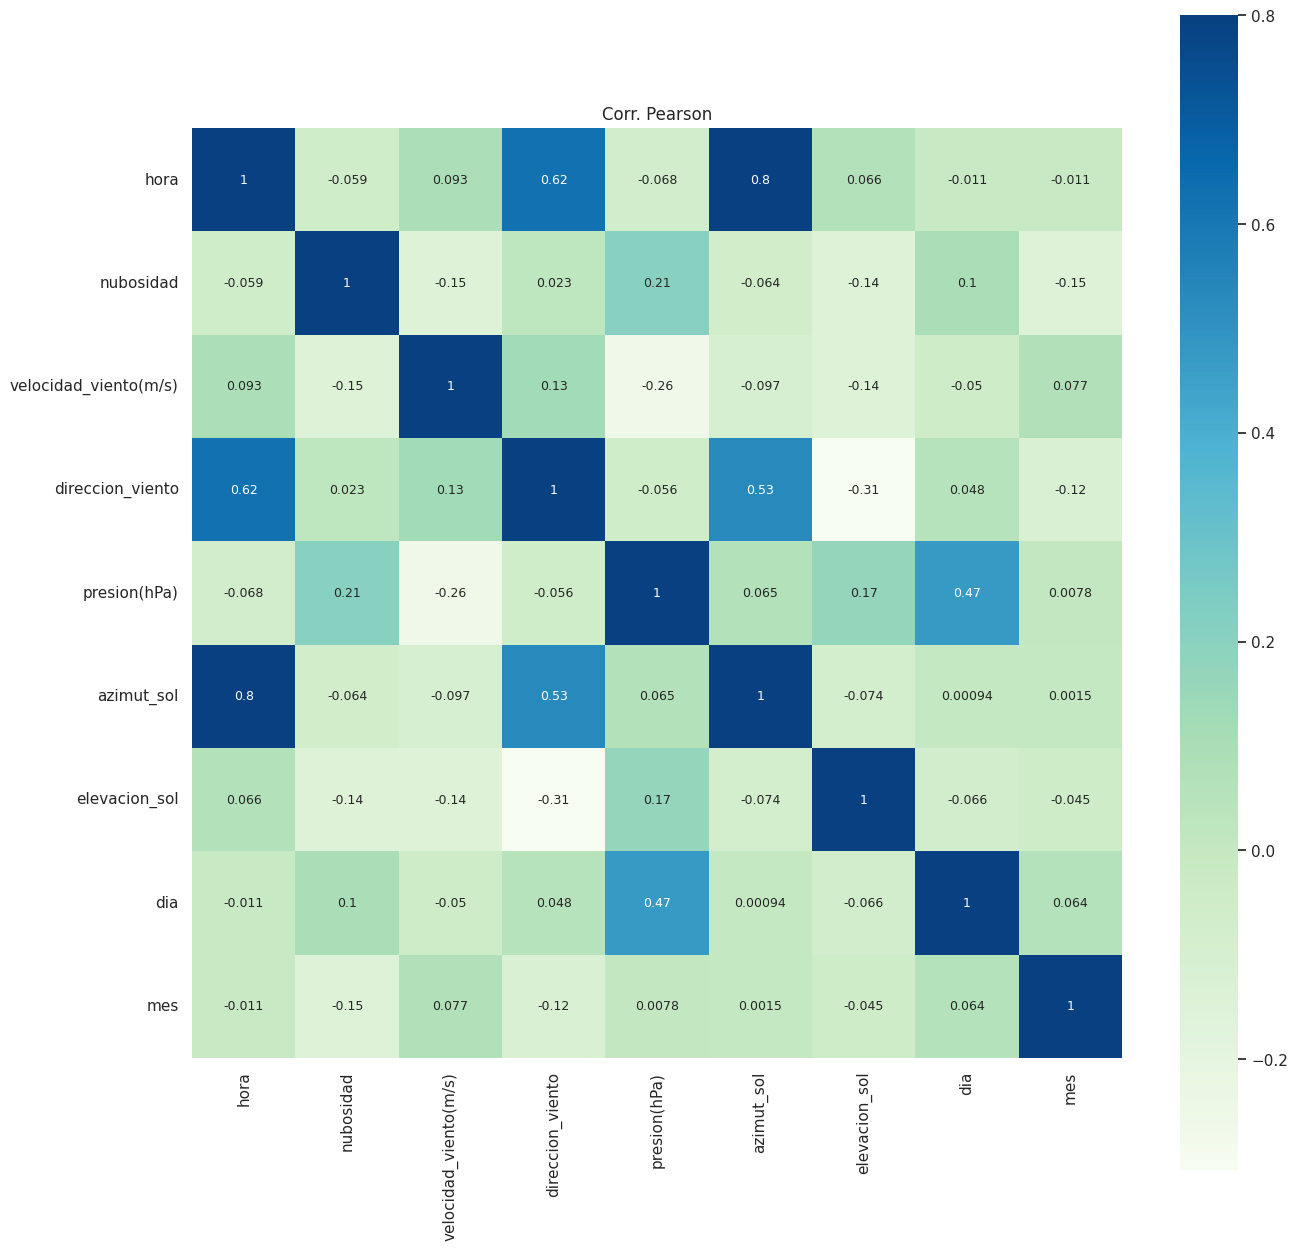

In [92]:
sns.set(style='whitegrid', font_scale=1) #Para ajustar el tamaño. Hacer un zoom sobre el mismo tamaño.
plt.figure(figsize=(15,15)) #Ajuste de Tamaño
plt.title("Corr. Pearson")
sns.heatmap(df_SegundoAumentado.corr(), vmax=0.8, square=True, cmap="GnBu", linecolor='r', annot=True, annot_kws={'size':9})#Mapa de calor.

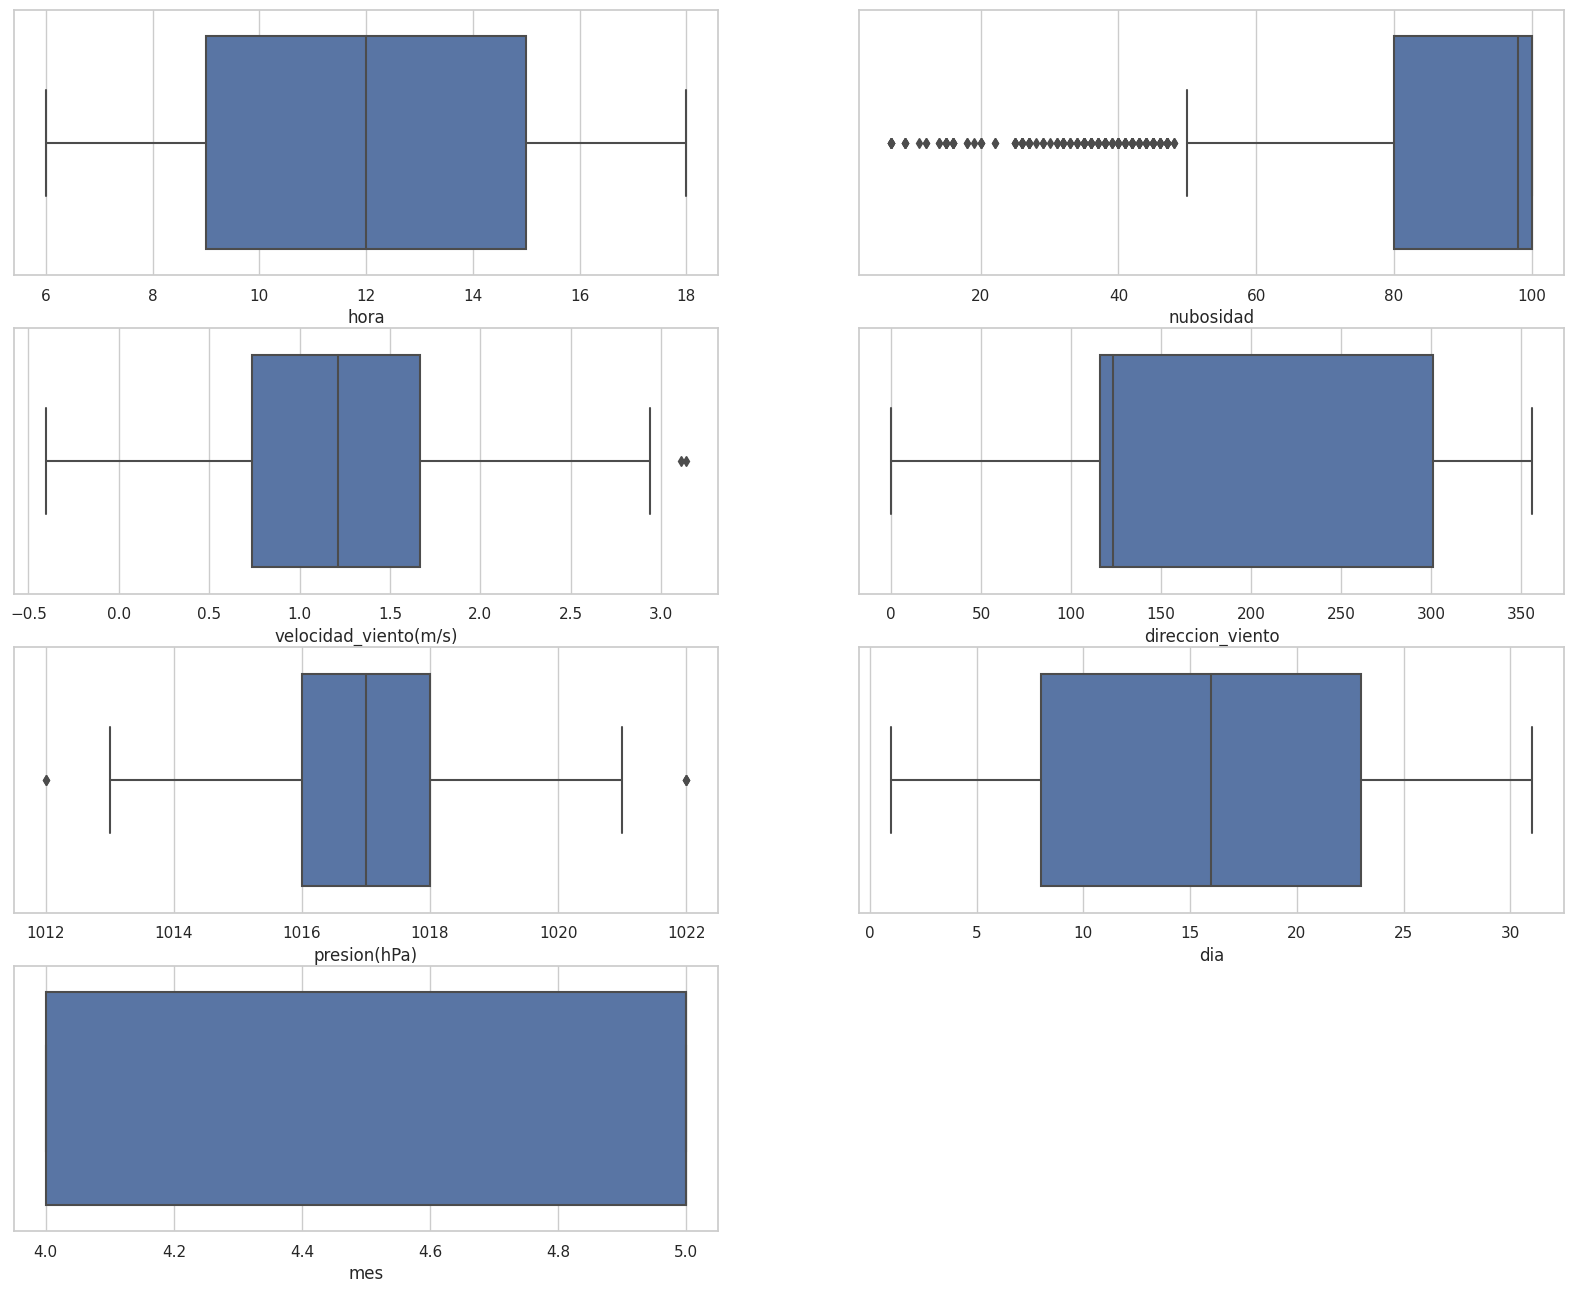

In [93]:
plt.figure(figsize=(20,20))

col = []
for column in df_SegundoAumentado.columns:
  if column not in ['azimut_sol','elevacion_sol']:
    col.append(column)

for i in enumerate(col):
  plt.subplot(5,2,i[0]+1)
  sns.boxplot(x=i[1], data=df_SegundoAumentado)

array([[<Axes: title={'center': 'hora'}>,
        <Axes: title={'center': 'nubosidad'}>,
        <Axes: title={'center': 'velocidad_viento(m/s)'}>],
       [<Axes: title={'center': 'direccion_viento'}>,
        <Axes: title={'center': 'presion(hPa)'}>,
        <Axes: title={'center': 'azimut_sol'}>],
       [<Axes: title={'center': 'elevacion_sol'}>,
        <Axes: title={'center': 'dia'}>, <Axes: title={'center': 'mes'}>]],
      dtype=object)

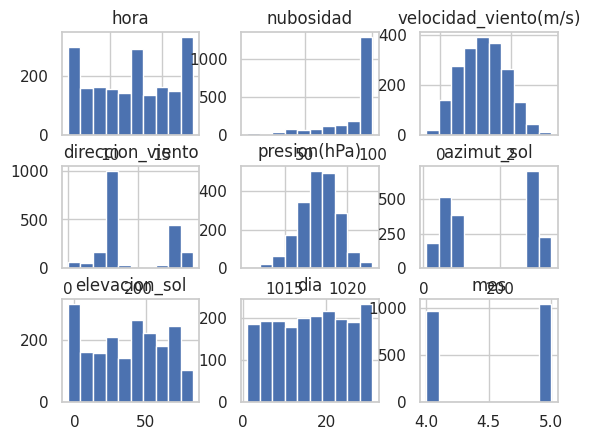

In [94]:
df_SegundoAumentado.hist()

In [95]:
X_Segundo = df_SegundoAumentado.drop(['azimut_sol','elevacion_sol'], axis=1)
y_Segundo = df_SegundoAumentado[['azimut_sol','elevacion_sol']]

In [96]:
scalerMinMaxSegundo = MinMaxScaler()
scalerMinMaxSegundo.fit(X_Segundo)
#guardar el scalerMinMaxSegundo con pickles
X_Segundo = scalerMinMaxSegundo.transform(X_Segundo)

In [97]:
X_trainSegundo, X_testSegundo, y_trainSegundo, y_testSegundo = train_test_split(X_Segundo, y_Segundo, random_state=200, test_size=0.3)

In [98]:
#ARQUITECTURA DEL MODELO
modelANNsegundo = Sequential()
modelANNsegundo.add(Dense(15,activation='relu'))
modelANNsegundo.add(Dense(10,activation='relu')) #Aqui va a aprender las caracteristicas de los patrones. Autoencoders es de redes neu que se encogen y se agrandan
#No existe una regla, solo se sabe q es menos que la anterior
modelANNsegundo.add(Dense(5,activation='relu'))
modelANNsegundo.add(Dense(2))
modelANNsegundo.compile(optimizer='adam', loss='mse')#adams o estocastico. El error medio cuadratico es la media del error en regresion, en clasificacion es accurency
#verbose en 1 es para que imprima en la consola y 0 es para que no imprima nada

In [99]:
modelANNsegundo.fit(x=X_trainSegundo, y=y_trainSegundo, validation_data=(X_testSegundo,y_testSegundo), batch_size=64, epochs=650, verbose=1)

Epoch 1/650
22/22 [==============================] - 1s 10ms/step - loss: 22391.5566 - val_loss: 21930.0879
Epoch 2/650
22/22 [==============================] - 0s 4ms/step - loss: 22367.2598 - val_loss: 21904.1680
Epoch 3/650
22/22 [==============================] - 0s 4ms/step - loss: 22330.6602 - val_loss: 21856.0742
Epoch 4/650
22/22 [==============================] - 0s 5ms/step - loss: 22272.5742 - val_loss: 21784.6270
Epoch 5/650
22/22 [==============================] - 0s 4ms/step - loss: 22183.7266 - val_loss: 21671.6445
Epoch 6/650
22/22 [==============================] - 0s 5ms/step - loss: 22032.5430 - val_loss: 21469.0273
Epoch 7/650
22/22 [==============================] - 0s 4ms/step - loss: 21768.0078 - val_loss: 21136.1641
Epoch 8/650
22/22 [==============================] - 0s 4ms/step - loss: 21359.8027 - val_loss: 20645.8691
Epoch 9/650
22/22 [==============================] - 0s 4ms/step - loss: 20764.9609 - val_loss: 19918.1113
Epoch 10/650
22/22 [================

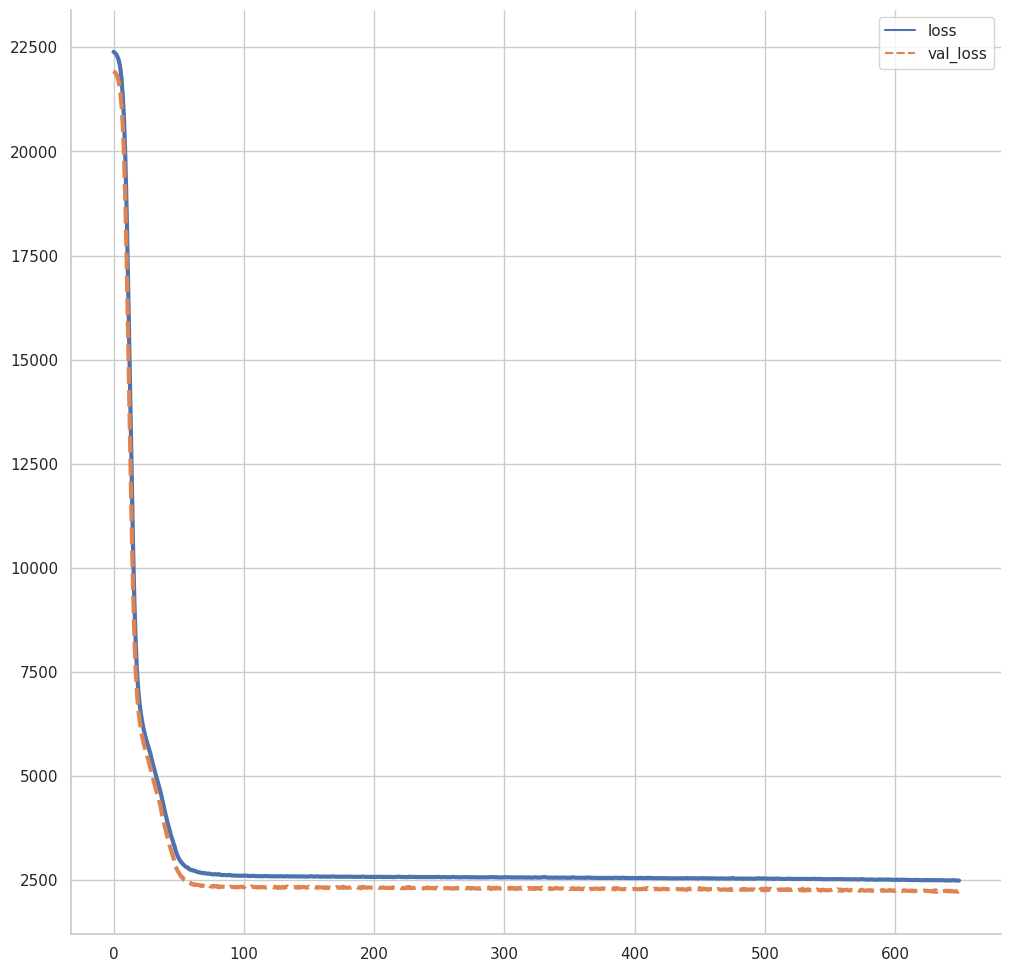

In [100]:
loss = pd.DataFrame(modelANNsegundo.history.history)#graficamos la perdida que significa cómo se va ajustando para aprender
plt.figure(figsize=(12,12))
sns.lineplot(data= loss, lw=3)
sns.despine()

In [101]:
y_pred_Testsegundo = modelANNsegundo.predict(X_testSegundo)
error_absoluteSegundo = mean_absolute_error(y_testSegundo, y_pred_Testsegundo)
print(error_absoluteSegundo)

19/19 [==============================] - 0s 2ms/step
32.07240255272389


In [102]:
y_pred_trainsegundo = modelANNsegundo.predict(X_trainSegundo)
error_absolute_trainSegundo = mean_absolute_error(y_trainSegundo, y_pred_trainsegundo)
print(error_absolute_trainSegundo)

44/44 [==============================] - 0s 2ms/step
34.188108667360915


Guardar escalado en archivo pkl

In [103]:
import joblib

In [104]:
file_name = "escaladoSeguidorVersion2.pkl"
joblib.dump(scalerMinMaxPrimero, file_name)

['escaladoSeguidorVersion2.pkl']

Guardar modelo ANN en archivo h5

In [105]:
modelANNprimero.save("modelANNSeguidorVersion2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
